In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
import os
from pycaret.classification import *

In [2]:
# 读取数据
path = "D:/Desktop/modelV3/ct20210926.csv"
dat = pd.read_csv(path)
dat.head()

,BLINDID,BMI_AUX_CM01,HT_CM01,WT_KG01,GENDER,RACE,AGE_DERV_01,BODE_INDEX01,COPDSCORE0101,CB_VISIT1,ASTHMA_BASELINE,EYES_ENT_CONDITION01,CARDIOVASCULAR_CONDITION01,GI_CONDITION01,PULMONARY_VASCULAR_CONDITION01,ONCOLOGY_HEMA_CONDITION01,GENITOURINARY_CONDITION01,ENDOCRINE_CONDITION01,MUSCULAR_SKELETAL_CONDITION01,DERMATOLOGY_CONDITION01,INFECTIOUS_DISEASE_CONDITION01,PSYCHIATRIC_CONDITION01,CB_FATHER01,CB_MOTHER01,EMPHYSEMA_FATHER01,EMPHYSEMA_MOTHER01,COPD_FATHER01,COPD_MOTHER01,ASTHMA_FATHER01,ASTHMA_MOTHER01,LUNGCA_FATHER01,LUNGCA_MOTHER01,CB_DIAGNOSED01,MCQ_TOT01,VSASCORE01,COPD_FOUNDATION_RANKING01,CURRENT_SMOKER_V1,VGDF_EVER01,VGDF_YEARS01,LONGESTJOBDURATION01,VGDF_LONGESTJOB01,SMOKING_PACK_YEARS01,MRC01,SGR_TOTALSCORE01,AVGMINORINNERDIAM_RB2,AVGMINORINNERDIAM_LB6,AVGMINORINNERDIAM_RB1,AVGMINORINNERDIAM_RB3,AVGMINORINNERDIAM_RB5,AVGMINORINNERDIAM_RB4,AVGMINORINNERDIAM_RB6,AVGMINORINNERDIAM_LB3,AVGMINORINNERDIAM_LB4,AVGMINORINNERDIAM_LB5,AVGMINORINNERDIAM_LB8,AVGMINORINNERDIAM_RB7,AVGMINORINNERDIAM_LB1,AVGMINORINNERDIAM_LB2,AVGMINORINNERDIAM_LB9,AVGMINORINNERDIAM_LB10,AVGMINORINNERDIAM_RB8,AVGMINORINNERDIAM_RB9,AVGMINORINNERDIAM_RB10,AVGMAJORINNERDIAM_RB2,AVGMAJORINNERDIAM_LB6,AVGMAJORINNERDIAM_RB1,AVGMAJORINNERDIAM_RB3,AVGMAJORINNERDIAM_RB5,AVGMAJORINNERDIAM_RB4,AVGMAJORINNERDIAM_RB6,AVGMAJORINNERDIAM_LB3,AVGMAJORINNERDIAM_LB4,AVGMAJORINNERDIAM_LB5,AVGMAJORINNERDIAM_LB8,AVGMAJORINNERDIAM_RB7,AVGMAJORINNERDIAM_LB1,AVGMAJORINNERDIAM_LB2,AVGMAJORINNERDIAM_LB9,AVGMAJORINNERDIAM_LB10,AVGMAJORINNERDIAM_RB8,AVGMAJORINNERDIAM_RB9,AVGMAJORINNERDIAM_RB10,AVGINNERAREA_RB2,AVGINNERAREA_LB6,AVGINNERAREA_RB1,AVGINNERAREA_RB3,AVGINNERAREA_RB5,AVGINNERAREA_RB4,AVGINNERAREA_RB6,AVGINNERAREA_LB3,AVGINNERAREA_LB4,AVGINNERAREA_LB5,AVGINNERAREA_LB8,AVGINNERAREA_RB7,AVGINNERAREA_LB1,AVGINNERAREA_LB2,AVGINNERAREA_LB9,AVGINNERAREA_LB10,AVGINNERAREA_RB8,AVGINNERAREA_RB9,AVGINNERAREA_RB10,AVGAVGWALLTHICKNESS_RB2,AVGAVGWALLTHICKNESS_LB6,AVGAVGWALLTHICKNESS_RB1,AVGAVGWALLTHICKNESS_RB3,AVGAVGWALLTHICKNESS_RB5,AVGAVGWALLTHICKNESS_RB4,AVGAVGWALLTHICKNESS_RB6,AVGAVGWALLTHICKNESS_LB3,AVGAVGWALLTHICKNESS_LB4,AVGAVGWALLTHICKNESS_LB5,AVGAVGWALLTHICKNESS_LB8,AVGAVGWALLTHICKNESS_RB7,AVGAVGWALLTHICKNESS_LB1,AVGAVGWALLTHICKNESS_LB2,AVGAVGWALLTHICKNESS_LB9,AVGAVGWALLTHICKNESS_LB10,AVGAVGWALLTHICKNESS_RB8,AVGAVGWALLTHICKNESS_RB9,AVGAVGWALLTHICKNESS_RB10,AVGMINOROUTERDIAM_RB2,AVGMINOROUTERDIAM_LB6,AVGMINOROUTERDIAM_RB1,AVGMINOROUTERDIAM_RB3,AVGMINOROUTERDIAM_RB5,AVGMINOROUTERDIAM_RB4,AVGMINOROUTERDIAM_RB6,AVGMINOROUTERDIAM_LB3,AVGMINOROUTERDIAM_LB4,AVGMINOROUTERDIAM_LB5,AVGMINOROUTERDIAM_LB8,AVGMINOROUTERDIAM_RB7,AVGMINOROUTERDIAM_LB1,AVGMINOROUTERDIAM_LB2,AVGMINOROUTERDIAM_LB9,AVGMINOROUTERDIAM_LB10,AVGMINOROUTERDIAM_RB8,AVGMINOROUTERDIAM_RB9,AVGMINOROUTERDIAM_RB10,AVGMAJOROUTERDIAM_RB2,AVGMAJOROUTERDIAM_LB6,AVGMAJOROUTERDIAM_RB1,AVGMAJOROUTERDIAM_RB3,AVGMAJOROUTERDIAM_RB5,AVGMAJOROUTERDIAM_RB4,AVGMAJOROUTERDIAM_RB6,AVGMAJOROUTERDIAM_LB3,AVGMAJOROUTERDIAM_LB4,AVGMAJOROUTERDIAM_LB5,AVGMAJOROUTERDIAM_LB8,AVGMAJOROUTERDIAM_RB7,AVGMAJOROUTERDIAM_LB1,AVGMAJOROUTERDIAM_LB2,AVGMAJOROUTERDIAM_LB9,AVGMAJOROUTERDIAM_LB10,AVGMAJOROUTERDIAM_RB8,AVGMAJOROUTERDIAM_RB9,AVGMAJOROUTERDIAM_RB10,AVGOUTERAREA_RB2,AVGOUTERAREA_LB6,AVGOUTERAREA_RB1,AVGOUTERAREA_RB3,AVGOUTERAREA_RB5,AVGOUTERAREA_RB4,AVGOUTERAREA_RB6,AVGOUTERAREA_LB3,AVGOUTERAREA_LB4,AVGOUTERAREA_LB5,AVGOUTERAREA_LB8,AVGOUTERAREA_RB7,AVGOUTERAREA_LB1,AVGOUTERAREA_LB2,AVGOUTERAREA_LB9,AVGOUTERAREA_LB10,AVGOUTERAREA_RB8,AVGOUTERAREA_RB9,AVGOUTERAREA_RB10,WALL_AREA_RB2,WALL_AREA_LB6,WALL_AREA_RB1,WALL_AREA_RB3,WALL_AREA_RB5,WALL_AREA_RB4,WALL_AREA_RB6,WALL_AREA_LB3,WALL_AREA_LB4,WALL_AREA_LB5,WALL_AREA_LB8,WALL_AREA_RB7,WALL_AREA_LB1,WALL_AREA_LB2,WALL_AREA_LB9,WALL_AREA_LB10,WALL_AREA_RB8,WALL_AREA_RB9,WALL_AREA_RB10,WALL_AREA_PERC_RB2,WALL_AREA_PERC_LB6,WALL_AREA_PERC_RB1,WALL_AREA_PERC_RB3,WALL_AREA_PERC_RB5,WALL_AREA_PERC_RB4,WALL_AREA_PERC_RB6,WALL_AREA_PERC_LB3,WALL_AREA_PERC_LB4,WALL_AREA_PERC_LB5,WALL_AREA_PERC_LB8,W

In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Columns: 1693 entries, BLINDID to outcome
dtypes: float64(1684), int64(6), object(3)
memory usage: 37.2+ MB


In [4]:
dat["outcome"] = dat['outcome'].apply(lambda x: 1 if x == 'COPD' else 0)

In [5]:
dat['outcome'].value_counts()

1    1766
0    1111
Name: outcome, dtype: int64

In [6]:
#COPD_FOUNDATION_RANKING01
dat = dat.drop(['COPD_FOUNDATION_RANKING01'], axis=1)

In [7]:
varmiss = dat.isnull().sum()*100/ len(dat) 

In [8]:
# import numpy as np
missing_features = varmiss[varmiss > 20].index
len(missing_features.to_list())

304

In [9]:
dat.drop(missing_features, axis=1, inplace=True)

In [10]:
#划分数据集
from sklearn.model_selection import train_test_split
#data:需要进行分割的数据集
#random_state:设置随机种子，保证每次运行生成相同的随机数
#test_size:将数据分割成训练集的比例
train_set, test_set = train_test_split(dat, test_size=0.2, random_state=432, shuffle=True)
train_set.head()

,BLINDID,BMI_AUX_CM01,HT_CM01,WT_KG01,GENDER,RACE,AGE_DERV_01,BODE_INDEX01,COPDSCORE0101,CB_VISIT1,ASTHMA_BASELINE,EYES_ENT_CONDITION01,CARDIOVASCULAR_CONDITION01,GI_CONDITION01,PULMONARY_VASCULAR_CONDITION01,ONCOLOGY_HEMA_CONDITION01,GENITOURINARY_CONDITION01,ENDOCRINE_CONDITION01,MUSCULAR_SKELETAL_CONDITION01,DERMATOLOGY_CONDITION01,INFECTIOUS_DISEASE_CONDITION01,PSYCHIATRIC_CONDITION01,CB_FATHER01,CB_MOTHER01,EMPHYSEMA_FATHER01,EMPHYSEMA_MOTHER01,COPD_FATHER01,COPD_MOTHER01,ASTHMA_FATHER01,ASTHMA_MOTHER01,LUNGCA_FATHER01,LUNGCA_MOTHER01,CB_DIAGNOSED01,MCQ_TOT01,VSASCORE01,CURRENT_SMOKER_V1,VGDF_EVER01,VGDF_YEARS01,LONGESTJOBDURATION01,VGDF_LONGESTJOB01,SMOKING_PACK_YEARS01,MRC01,SGR_TOTALSCORE01,AVGMINORINNERDIAM_RB2,AVGMINORINNERDIAM_LB6,AVGMINORINNERDIAM_RB1,AVGMINORINNERDIAM_RB3,AVGMINORINNERDIAM_RB5,AVGMINORINNERDIAM_RB4,AVGMINORINNERDIAM_RB6,AVGMINORINNERDIAM_LB3,AVGMINORINNERDIAM_LB4,AVGMINORINNERDIAM_LB5,AVGMINORINNERDIAM_LB8,AVGMINORINNERDIAM_RB7,AVGMINORINNERDIAM_LB1,AVGMINORINNERDIAM_LB2,AVGMINORINNERDIAM_LB9,AVGMINORINNERDIAM_LB10,AVGMINORINNERDIAM_RB8,AVGMINORINNERDIAM_RB9,AVGMINORINNERDIAM_RB10,AVGMAJORINNERDIAM_RB2,AVGMAJORINNERDIAM_LB6,AVGMAJORINNERDIAM_RB1,AVGMAJORINNERDIAM_RB3,AVGMAJORINNERDIAM_RB5,AVGMAJORINNERDIAM_RB4,AVGMAJORINNERDIAM_RB6,AVGMAJORINNERDIAM_LB3,AVGMAJORINNERDIAM_LB4,AVGMAJORINNERDIAM_LB5,AVGMAJORINNERDIAM_LB8,AVGMAJORINNERDIAM_RB7,AVGMAJORINNERDIAM_LB1,AVGMAJORINNERDIAM_LB2,AVGMAJORINNERDIAM_LB9,AVGMAJORINNERDIAM_LB10,AVGMAJORINNERDIAM_RB8,AVGMAJORINNERDIAM_RB9,AVGMAJORINNERDIAM_RB10,AVGINNERAREA_RB2,AVGINNERAREA_LB6,AVGINNERAREA_RB1,AVGINNERAREA_RB3,AVGINNERAREA_RB5,AVGINNERAREA_RB4,AVGINNERAREA_RB6,AVGINNERAREA_LB3,AVGINNERAREA_LB4,AVGINNERAREA_LB5,AVGINNERAREA_LB8,AVGINNERAREA_RB7,AVGINNERAREA_LB1,AVGINNERAREA_LB2,AVGINNERAREA_LB9,AVGINNERAREA_LB10,AVGINNERAREA_RB8,AVGINNERAREA_RB9,AVGINNERAREA_RB10,AVGAVGWALLTHICKNESS_RB2,AVGAVGWALLTHICKNESS_LB6,AVGAVGWALLTHICKNESS_RB1,AVGAVGWALLTHICKNESS_RB3,AVGAVGWALLTHICKNESS_RB5,AVGAVGWALLTHICKNESS_RB4,AVGAVGWALLTHICKNESS_RB6,AVGAVGWALLTHICKNESS_LB3,AVGAVGWALLTHICKNESS_LB4,AVGAVGWALLTHICKNESS_LB5,AVGAVGWALLTHICKNESS_LB8,AVGAVGWALLTHICKNESS_RB7,AVGAVGWALLTHICKNESS_LB1,AVGAVGWALLTHICKNESS_LB2,AVGAVGWALLTHICKNESS_LB9,AVGAVGWALLTHICKNESS_LB10,AVGAVGWALLTHICKNESS_RB8,AVGAVGWALLTHICKNESS_RB9,AVGAVGWALLTHICKNESS_RB10,AVGMINOROUTERDIAM_RB2,AVGMINOROUTERDIAM_LB6,AVGMINOROUTERDIAM_RB1,AVGMINOROUTERDIAM_RB3,AVGMINOROUTERDIAM_RB5,AVGMINOROUTERDIAM_RB4,AVGMINOROUTERDIAM_RB6,AVGMINOROUTERDIAM_LB3,AVGMINOROUTERDIAM_LB4,AVGMINOROUTERDIAM_LB5,AVGMINOROUTERDIAM_LB8,AVGMINOROUTERDIAM_RB7,AVGMINOROUTERDIAM_LB1,AVGMINOROUTERDIAM_LB2,AVGMINOROUTERDIAM_LB9,AVGMINOROUTERDIAM_LB10,AVGMINOROUTERDIAM_RB8,AVGMINOROUTERDIAM_RB9,AVGMINOROUTERDIAM_RB10,AVGMAJOROUTERDIAM_RB2,AVGMAJOROUTERDIAM_LB6,AVGMAJOROUTERDIAM_RB1,AVGMAJOROUTERDIAM_RB3,AVGMAJOROUTERDIAM_RB5,AVGMAJOROUTERDIAM_RB4,AVGMAJOROUTERDIAM_RB6,AVGMAJOROUTERDIAM_LB3,AVGMAJOROUTERDIAM_LB4,AVGMAJOROUTERDIAM_LB5,AVGMAJOROUTERDIAM_LB8,AVGMAJOROUTERDIAM_RB7,AVGMAJOROUTERDIAM_LB1,AVGMAJOROUTERDIAM_LB2,AVGMAJOROUTERDIAM_LB9,AVGMAJOROUTERDIAM_LB10,AVGMAJOROUTERDIAM_RB8,AVGMAJOROUTERDIAM_RB9,AVGMAJOROUTERDIAM_RB10,AVGOUTERAREA_RB2,AVGOUTERAREA_LB6,AVGOUTERAREA_RB1,AVGOUTERAREA_RB3,AVGOUTERAREA_RB5,AVGOUTERAREA_RB4,AVGOUTERAREA_RB6,AVGOUTERAREA_LB3,AVGOUTERAREA_LB4,AVGOUTERAREA_LB5,AVGOUTERAREA_LB8,AVGOUTERAREA_RB7,AVGOUTERAREA_LB1,AVGOUTERAREA_LB2,AVGOUTERAREA_LB9,AVGOUTERAREA_LB10,AVGOUTERAREA_RB8,AVGOUTERAREA_RB9,AVGOUTERAREA_RB10,WALL_AREA_RB2,WALL_AREA_LB6,WALL_AREA_RB1,WALL_AREA_RB3,WALL_AREA_RB5,WALL_AREA_RB4,WALL_AREA_RB6,WALL_AREA_LB3,WALL_AREA_LB4,WALL_AREA_LB5,WALL_AREA_LB8,WALL_AREA_RB7,WALL_AREA_LB1,WALL_AREA_LB2,WALL_AREA_LB9,WALL_AREA_LB10,WALL_AREA_RB8,WALL_AREA_RB9,WALL_AREA_RB10,WALL_AREA_PERC_RB2,WALL_AREA_PERC_LB6,WALL_AREA_PERC_RB1,WALL_AREA_PERC_RB3,WALL_AREA_PERC_RB5,WALL_AREA_PERC_RB4,WALL_AREA_PERC_RB6,WALL_AREA_PERC_LB3,WALL_AREA_PERC_LB4,WALL_AREA_PERC_LB5,WALL_AREA_PERC_LB8,WALL_AREA_PERC_RB7,WALL_ARE

In [11]:
 setup(         data = train_set,                        #数据集
                target = 'outcome',                      #tag
                ignore_features = ['BLINDID'],           #模型训练期间忽略特征。它接受一个包含要忽略的列名的字符串列表。
#                 handle_unknown_categorical=False,
                session_id = 432,                        #设置随机种子，保证每次运行生成相同的随机数
                preprocess=True,                         #预处理
                numeric_imputation='median',             #缺失值处理方法
                transformation= False,                   #转型 当设置为True时，它应用幂变换使数据更像高斯。
                feature_selection=True,                  #特征选择
                feature_selection_method= 'classic',     #特征选择方法
                feature_selection_threshold = 0.01,      #用于特征选择的阈值
                data_split_stratify = True,              #数据分割分层
                fix_imbalance=True,                      #当训练集数据分布不均匀时，默认方法算法SMOTE
#                 remove_perfect_collinearity = True,
                test_data= test_set
               )  

,Description,Value
0,session_id,432
1,Target,outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2301, 1388)"
5,Missing Values,True
6,Numeric Features,1353
7,Categorical Features,33
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
# # 训练集测试集数据  train_set, test_set
X_train = get_config("X_train")
X_test = get_config("X_test")
y_train = get_config("y_train")
y_test = get_config("y_test")

In [12]:
compare_models(turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8431,0.9161,0.8483,0.8934,0.8700,0.6724,0.6744,0.0660
gbc,Gradient Boosting Classifier,0.8396,0.9238,0.8455,0.8907,0.8672,0.6650,0.6671,0.2520
ridge,Ridge Classifier,0.8357,0.0000,0.8174,0.9083,0.8603,0.6623,0.6680,0.0060
lda,Linear Discriminant Analysis,0.8357,0.9258,0.8174,0.9083,0.8603,0.6623,0.6680,0.0080
rf,Random Forest Classifier,0.8331,0.9180,0.8364,0.8885,0.8613,0.6521,0.6547,0.0970
lightgbm,Light Gradient Boosting Machine,0.8309,0.9195,0.8504,0.8737,0.8616,0.6443,0.6454,0.1710
xgboost,Extreme Gradient Boosting,0.8292,0.9144,0.8462,0.8746,0.8598,0.6413,0.6426,0.3230
et,Extra Trees Classifier,0.8288,0.9150,0.8385,0.8805,0.8586,0.6417,0.6438,0.0580
lr,Logistic Regression,0.8270,0.9192,0.8111,0.8999,0.8530,0.6442,0.6498,0.3770
mlp,MLP Classifier,0.7858,0.8948,0.7752,0.8848,0.8159,0.5559,0.5867,0.1640


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=432)

In [14]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9253,0.8671,0.8986,0.8826,0.7004,0.7011
1,0.8565,0.9334,0.8592,0.9037,0.8809,0.7008,0.7022
2,0.8000,0.8705,0.8099,0.8582,0.8333,0.5839,0.5854
3,0.8348,0.9077,0.8310,0.8939,0.8613,0.6577,0.6604
4,0.8565,0.9284,0.8803,0.8865,0.8834,0.6970,0.6970
5,0.8304,0.9336,0.8169,0.8992,0.8561,0.6509,0.6553
6,0.8217,0.8897,0.8521,0.8582,0.8551,0.6235,0.6235
7,0.8783,0.9363,0.8531,0.9457,0.8971,0.7491,0.7551
8,0.8696,0.9355,0.8601,0.9248,0.8913,0.7288,0.7318
9,0.8261,0.9010,0.8531,0.8652,0.8592,0.6319,0.6320


In [15]:
ada = tune_model(ada,optimize="AUC",search_library="scikit-learn")#贝叶斯优化超参数scikit-optimize    scikit-learn

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8485,0.9352,0.8462,0.9030,0.8736,0.6850,0.6872
1,0.8609,0.9370,0.8521,0.9167,0.8832,0.7117,0.7146
2,0.8130,0.8947,0.8169,0.8722,0.8436,0.6118,0.6139
3,0.8348,0.9168,0.8310,0.8939,0.8613,0.6577,0.6604
4,0.8652,0.9277,0.8803,0.8993,0.8897,0.7165,0.7168
5,0.8391,0.9408,0.8099,0.9200,0.8614,0.6716,0.6793
6,0.8174,0.8930,0.8380,0.8623,0.8500,0.6168,0.6172
7,0.8739,0.9392,0.8322,0.9597,0.8914,0.7429,0.7537
8,0.8435,0.9409,0.8252,0.9147,0.8676,0.6774,0.6828
9,0.8087,0.9080,0.8112,0.8722,0.8406,0.6022,0.6047


In [16]:
train_ada=predict_model(ada,train_set,raw_score=True)
test_ada= predict_model(ada,test_set,raw_score=True)

In [17]:
predict_model(ada,raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8611,0.9451,0.8538,0.9068,0.8795,0.7159,0.7177


,LEFT_PCT_BE_910_rv,TRL_HU15_rv,LEFT_HU15_rv,BOTH_HU15_rv,TLL_HU15_rv,TRU_HU15_rv,RL_PCT_BE_950_TLC,TRM_PCT_BE_856_rv,TRU_PCT_BE_950_rv,TRL_TIS_V_TLC,...,LL_PCT_BE_950_TLC,TLU_PCT_BE_950_rv,RU_TOT_V_TLC,BOTH_PCT_BE_910_rv,SGR_TOTALSCORE01,RU_TIS_V_TLC,outcome,Label,Score_0,Score_1
0,5.770000,-909.140015,-884.229980,-889.450012,-892.109985,-873.250000,3.02,33.959999,0.140000,130.770172,...,5.830000,0.100000,1401.496948,7.190000,17.806269,197.217499,0,1,0.4841,0.5159
1,2.545999,-832.463806,-834.225220,-841.391113,-761.655518,-847.709106,1.51,13.514337,1.179725,173.102051,...,0.840000,1.324439,1755.616211,2.608497,14.410784,271.831757,1,1,0.4862,0.5138
2,6.165095,-895.920044,-878.687622,-878.161560,-899.251282,-893.909241,5.64,16.583298,3.755853,151.027039,...,7.500000,2.776859,1941.881836,6.141580,19.360659,231.735718,1,1,0.4171,0.5829
3,45.721706,-920.057007,-951.586670,-951.902100,-929.536438,-962.819336,18.18,74.819839,25.785629,104.902451,...,21.389999,23.686577,1497.347412,45.264572,38.856583,133.801682,1,1,0.3430,0.6570
4,46.969658,-901.682190,-980.545044,-981.599426,-905.028137,-994.588867,4.31,66.827049,55.994122,160.299606,...,7.800000,54.674198,2357.797607,49.445129,52.764576,160.701523,1,1,0.3311,0.6689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.150000,-790.890015,-764.159973,-765.340027,-787.190002,-726.659973,0.31,0.770000,0.010000,100.086197,...,0.310000,0.020000,864.041077,0.110000,34.988880,157.354584,1,0,0.5285,0.4715
572,0.491630,-769.131897,-804.712097,-799.190125,-768.106079,-777.790344,0.35,2.618300,0.135476,83.104164,...,0.540000,0.104865,1019.020630,0.428209,49.678280,165.776215,0,0,0.5137,0.4863
573,0.970000,-839.109985,-831.340027,-833.849976,-834.789978,-819.530029,0.40,9.930000,0.340000,81.264404,...,1.120000,0.190000,811.304382,1.060000,29.965923,147.654022,1,0,0.5061,0.4939
574,7.023281,-864.598328,-884.369812,-884.058472,-867.436768,-868.537842,2.39,32.806599,1.065412,144.219086,...,2.820000,2.358766,1227.086670,6.946209,37.423058,201.457260,1,1,0.4695,0.5305


In [19]:
# ada训练集准确率
accuracy_score(y_train,ada.predict(X_train))

0.8596262494567579

In [21]:
# ada测试集准确率
accuracy_score(y_test,ada.predict(X_test))

0.8611111111111112

In [140]:
#训练集auc
adaacu = roc_auc_score(train_ada['outcome'], train_ada['Score_1'])
adaacu 

0.9451738722406571

In [141]:
#测试集acu
adaacut = roc_auc_score(test_ada['outcome'], test_ada['Score_1'])
adaacut

0.9450567301444495

In [25]:
from sklearn.metrics import f1_score

In [51]:
from sklearn.metrics import precision_score

In [56]:
def cals(maodeln):
    x_f1 = f1_score(y_train,maodeln.predict(X_train))
    c_f1 = f1_score(y_test,maodeln.predict(X_test))
    x_per = precision_score(y_train,maodeln.predict(X_train))
    c_per = precision_score(y_test,maodeln.predict(X_test))
    return x_f1,c_f1,x_per,c_per

In [57]:
cals(ada)

(0.8826734471485653, 0.8795180722891567, 0.9142212189616253, 0.906832298136646)

In [60]:
#cat训练集混淆矩阵
adacm=confusion_matrix(y_train,ada.predict(X_train))
adacm

array([[ 763,  114],
       [ 209, 1215]], dtype=int64)

In [168]:
#cat训练集敏感性
sensitivity_cat = adacm[0,0]/(adacm[0,0]+adacm[0,1])
sensitivity_cat

0.8700114025085519

In [61]:
#cat训练集特异性
specificity_ada = adacm[1,1]/(adacm[1,0]+adacm[1,1])
specificity_ada

0.8532303370786517

In [62]:
#cat测试集混淆矩阵
adacmt=confusion_matrix(y_test,ada.predict(X_test))
adacmt

array([[204,  30],
       [ 50, 292]], dtype=int64)

In [64]:
#cat测试集特异性
specificity_adat = adacmt[1,1]/(adacmt[1,0]+adacmt[1,1])
specificity_adat

0.8538011695906432

In [66]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8442,0.9277,0.8252,0.9147,0.8676,0.6794,0.6847
1,0.8348,0.9381,0.8239,0.9000,0.8603,0.6591,0.6630
2,0.7739,0.8832,0.7606,0.8571,0.8060,0.5374,0.5430
3,0.8348,0.9354,0.8028,0.9194,0.8571,0.6634,0.6720
4,0.8435,0.9201,0.8451,0.8955,0.8696,0.6743,0.6761
5,0.8652,0.9467,0.8380,0.9370,0.8848,0.7237,0.7302
6,0.8130,0.8904,0.8099,0.8779,0.8425,0.6135,0.6165
7,0.8565,0.9539,0.8112,0.9508,0.8755,0.7087,0.7212
8,0.8522,0.9368,0.8392,0.9160,0.8759,0.6940,0.6981
9,0.8391,0.9257,0.8182,0.9141,0.8635,0.6692,0.6753


In [67]:
lda = tune_model(lda,optimize="AUC",search_library="scikit-learn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8312,0.9286,0.8182,0.9000,0.8571,0.6519,0.6564
1,0.8391,0.9407,0.8169,0.9134,0.8625,0.6702,0.6763
2,0.7913,0.8853,0.7746,0.8730,0.8209,0.5730,0.5789
3,0.8435,0.9376,0.8099,0.9274,0.8647,0.6811,0.6899
4,0.8522,0.9235,0.8380,0.9154,0.8750,0.6950,0.6991
5,0.8565,0.9448,0.8310,0.9291,0.8773,0.7058,0.7122
6,0.8261,0.8920,0.8169,0.8923,0.8529,0.6412,0.6449
7,0.8565,0.9503,0.8042,0.9583,0.8745,0.7100,0.7249
8,0.8435,0.9369,0.8322,0.9084,0.8686,0.6760,0.6800
9,0.8304,0.9242,0.8252,0.8939,0.8582,0.6482,0.6514


In [68]:
train_lda=predict_model(lda,train_set,raw_score=True)
test_lda= predict_model(lda,test_set,raw_score=True)

In [69]:
predict_model(lda,raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8559,0.9365,0.8421,0.9085,0.8741,0.7063,0.7090


,LEFT_PCT_BE_910_rv,TRL_HU15_rv,LEFT_HU15_rv,BOTH_HU15_rv,TLL_HU15_rv,TRU_HU15_rv,RL_PCT_BE_950_TLC,TRM_PCT_BE_856_rv,TRU_PCT_BE_950_rv,TRL_TIS_V_TLC,...,LL_PCT_BE_950_TLC,TLU_PCT_BE_950_rv,RU_TOT_V_TLC,BOTH_PCT_BE_910_rv,SGR_TOTALSCORE01,RU_TIS_V_TLC,outcome,Label,Score_0,Score_1
0,5.770000,-909.140015,-884.229980,-889.450012,-892.109985,-873.250000,3.02,33.959999,0.140000,130.770172,...,5.830000,0.100000,1401.496948,7.190000,17.806269,197.217499,0,1,0.2193,0.7807
1,2.545999,-832.463806,-834.225220,-841.391113,-761.655518,-847.709106,1.51,13.514337,1.179725,173.102051,...,0.840000,1.324439,1755.616211,2.608497,14.410784,271.831757,1,1,0.2864,0.7136
2,6.165095,-895.920044,-878.687622,-878.161560,-899.251282,-893.909241,5.64,16.583298,3.755853,151.027039,...,7.500000,2.776859,1941.881836,6.141580,19.360659,231.735718,1,1,0.0844,0.9156
3,45.721706,-920.057007,-951.586670,-951.902100,-929.536438,-962.819336,18.18,74.819839,25.785629,104.902451,...,21.389999,23.686577,1497.347412,45.264572,38.856583,133.801682,1,1,0.0625,0.9375
4,46.969658,-901.682190,-980.545044,-981.599426,-905.028137,-994.588867,4.31,66.827049,55.994122,160.299606,...,7.800000,54.674198,2357.797607,49.445129,52.764576,160.701523,1,1,0.0883,0.9117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.150000,-790.890015,-764.159973,-765.340027,-787.190002,-726.659973,0.31,0.770000,0.010000,100.086197,...,0.310000,0.020000,864.041077,0.110000,34.988880,157.354584,1,0,0.9024,0.0976
572,0.491630,-769.131897,-804.712097,-799.190125,-768.106079,-777.790344,0.35,2.618300,0.135476,83.104164,...,0.540000,0.104865,1019.020630,0.428209,49.678280,165.776215,0,0,0.8700,0.1300
573,0.970000,-839.109985,-831.340027,-833.849976,-834.789978,-819.530029,0.40,9.930000,0.340000,81.264404,...,1.120000,0.190000,811.304382,1.060000,29.965923,147.654022,1,0,0.6522,0.3478
574,7.023281,-864.598328,-884.369812,-884.058472,-867.436768,-868.537842,2.39,32.806599,1.065412,144.219086,...,2.820000,2.358766,1227.086670,6.946209,37.423058,201.457260,1,1,0.0406,0.9594


In [70]:
cals(lda)

(0.8641063515509603,
 0.8740515933232169,
 0.9112149532710281,
 0.9085173501577287)

In [71]:
# 训练集准确率
accuracy_score(y_train,lda.predict(X_train))

0.8400695349847892

In [72]:
# 测试集准确率
accuracy_score(y_test,lda.predict(X_test))

0.8559027777777778

In [73]:
#训练集auc
ldaauc = roc_auc_score(train_lda['outcome'], train_lda['Score_1'])
ldaauc

0.9299318251700768

In [74]:
#测试集acu
ldaauct = roc_auc_score(test_lda['outcome'], test_lda['Score_1'])
ldaauct

0.9364847303443793

In [75]:
#lgb训练集混淆矩阵
ldacm=confusion_matrix(y_train,lda.predict(X_train))
ldacm

array([[ 763,  114],
       [ 254, 1170]], dtype=int64)

In [169]:
sensitivity_da= ldacm[0,0]/(ldacm[0,0]+ldacm[0,1])
sensitivity_da

0.8700114025085519

In [76]:
#lgb训练集特异性
specificity_lda = ldacm[1,1]/(ldacm[1,0]+ldacm[1,1])
specificity_lda

0.8216292134831461

In [77]:
#lgb测试集混淆矩阵
ldacmt=confusion_matrix(y_test,lda.predict(X_test))
ldacmt

array([[205,  29],
       [ 54, 288]], dtype=int64)

In [78]:
#lgb测试集特异性
specificity_ldatest = ldacmt[1,1]/(ldacmt[1,0]+ldacmt[1,1])
specificity_ldatest

0.8421052631578947

In [92]:
lightgbm = create_model('lightgbm')#额外树分类器

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8615,0.9383,0.8671,0.9051,0.8857,0.7101,0.7111
1,0.8435,0.9420,0.8592,0.8841,0.8714,0.6715,0.6720
2,0.8043,0.8793,0.8310,0.8489,0.8399,0.5885,0.5888
3,0.8087,0.9066,0.8592,0.8356,0.8472,0.5915,0.5919
4,0.8087,0.9221,0.8169,0.8657,0.8406,0.6020,0.6035
5,0.8217,0.9352,0.8099,0.8915,0.8487,0.6330,0.6373
6,0.8304,0.9038,0.8732,0.8552,0.8641,0.6387,0.6390
7,0.8609,0.9346,0.8671,0.9051,0.8857,0.7081,0.7092
8,0.8522,0.9363,0.8601,0.8978,0.8786,0.6899,0.6909
9,0.8174,0.8969,0.8601,0.8483,0.8542,0.6100,0.6101


In [93]:
lightgbm = tune_model(lightgbm,optimize="AUC",search_library="scikit-learn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8528,0.9276,0.8531,0.9037,0.8777,0.6933,0.6951
1,0.8391,0.9328,0.8239,0.9070,0.8635,0.6688,0.6734
2,0.8130,0.8832,0.8169,0.8722,0.8436,0.6118,0.6139
3,0.8174,0.9173,0.8169,0.8788,0.8467,0.6217,0.6242
4,0.8522,0.9262,0.8380,0.9154,0.8750,0.6950,0.6991
5,0.8435,0.9354,0.8099,0.9274,0.8647,0.6811,0.6899
6,0.8087,0.8939,0.8239,0.8603,0.8417,0.6003,0.6011
7,0.8783,0.9421,0.8392,0.9600,0.8955,0.7513,0.7610
8,0.8609,0.9386,0.8392,0.9302,0.8824,0.7132,0.7189
9,0.8565,0.9088,0.8741,0.8929,0.8834,0.6970,0.6973


In [94]:
predict_model(lightgbm,raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8576,0.9323,0.8450,0.9088,0.8758,0.7096,0.7122


,LEFT_PCT_BE_910_rv,TRL_HU15_rv,LEFT_HU15_rv,BOTH_HU15_rv,TLL_HU15_rv,TRU_HU15_rv,RL_PCT_BE_950_TLC,TRM_PCT_BE_856_rv,TRU_PCT_BE_950_rv,TRL_TIS_V_TLC,...,LL_PCT_BE_950_TLC,TLU_PCT_BE_950_rv,RU_TOT_V_TLC,BOTH_PCT_BE_910_rv,SGR_TOTALSCORE01,RU_TIS_V_TLC,outcome,Label,Score_0,Score_1
0,5.770000,-909.140015,-884.229980,-889.450012,-892.109985,-873.250000,3.02,33.959999,0.140000,130.770172,...,5.830000,0.100000,1401.496948,7.190000,17.806269,197.217499,0,1,0.1220,0.8780
1,2.545999,-832.463806,-834.225220,-841.391113,-761.655518,-847.709106,1.51,13.514337,1.179725,173.102051,...,0.840000,1.324439,1755.616211,2.608497,14.410784,271.831757,1,1,0.4249,0.5751
2,6.165095,-895.920044,-878.687622,-878.161560,-899.251282,-893.909241,5.64,16.583298,3.755853,151.027039,...,7.500000,2.776859,1941.881836,6.141580,19.360659,231.735718,1,1,0.0319,0.9681
3,45.721706,-920.057007,-951.586670,-951.902100,-929.536438,-962.819336,18.18,74.819839,25.785629,104.902451,...,21.389999,23.686577,1497.347412,45.264572,38.856583,133.801682,1,1,0.0263,0.9737
4,46.969658,-901.682190,-980.545044,-981.599426,-905.028137,-994.588867,4.31,66.827049,55.994122,160.299606,...,7.800000,54.674198,2357.797607,49.445129,52.764576,160.701523,1,1,0.0246,0.9754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.150000,-790.890015,-764.159973,-765.340027,-787.190002,-726.659973,0.31,0.770000,0.010000,100.086197,...,0.310000,0.020000,864.041077,0.110000,34.988880,157.354584,1,0,0.8527,0.1473
572,0.491630,-769.131897,-804.712097,-799.190125,-768.106079,-777.790344,0.35,2.618300,0.135476,83.104164,...,0.540000,0.104865,1019.020630,0.428209,49.678280,165.776215,0,0,0.8272,0.1728
573,0.970000,-839.109985,-831.340027,-833.849976,-834.789978,-819.530029,0.40,9.930000,0.340000,81.264404,...,1.120000,0.190000,811.304382,1.060000,29.965923,147.654022,1,0,0.6778,0.3222
574,7.023281,-864.598328,-884.369812,-884.058472,-867.436768,-868.537842,2.39,32.806599,1.065412,144.219086,...,2.820000,2.358766,1227.086670,6.946209,37.423058,201.457260,1,1,0.0606,0.9394


In [95]:
cals(lightgbm)

(0.8913830557566981,
 0.8757575757575757,
 0.9200298953662183,
 0.9088050314465409)

In [96]:
train_lgb=predict_model(lightgbm,train_set,raw_score=True)
test_lgb=predict_model(lightgbm,test_set,raw_score=True)

In [99]:
# 训练集准确率
accuracy_score(y_train,lightgbm.predict(X_train))

0.8696219035202086

In [100]:
# 测试集准确率
accuracy_score(y_test,lightgbm.predict(X_test))

0.8576388888888888

In [101]:
#训练集auc
lgbauc = roc_auc_score(train_lgb['outcome'], train_lgb['Score_1'])
lgbauc

0.9430743373092643

In [102]:
#测试集acu
lgbauct = roc_auc_score(test_lgb['outcome'], test_lgb['Score_1'])
lgbauct

0.9322924476433249

In [103]:
#训练集混淆矩阵
lgbcm=confusion_matrix(y_train,lightgbm.predict(X_train))
lgbcm

array([[ 770,  107],
       [ 193, 1231]], dtype=int64)

In [170]:
sensitivity_lgb = lgbcm[0,0]/(lgbcm[0,0]+lgbcm[0,1])
sensitivity_lgb

0.8779931584948689

In [104]:
#训练集特异性
specificity_lgb = lgbcm[1,1]/(lgbcm[1,0]+lgbcm[1,1])
specificity_lgb

0.8644662921348315

In [105]:
#测试集混淆矩阵
lgbcmt=confusion_matrix(y_test,lightgbm.predict(X_test))
lgbcmt

array([[205,  29],
       [ 53, 289]], dtype=int64)

In [107]:
#lgb测试集特异性
specificity_lgbt = lgbcmt[1,1]/(lgbcmt[1,0]+lgbcmt[1,1])
specificity_lgbt

0.8450292397660819

In [108]:
rf = create_model('rf',round=2)#随机森林

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.84,0.93,0.83,0.89,0.86,0.66,0.66
1,0.84,0.93,0.84,0.89,0.87,0.67,0.67
2,0.82,0.89,0.82,0.88,0.85,0.63,0.63
3,0.81,0.91,0.85,0.85,0.85,0.60,0.60
4,0.84,0.92,0.85,0.89,0.87,0.66,0.67
5,0.84,0.93,0.82,0.91,0.86,0.67,0.68
6,0.81,0.89,0.85,0.85,0.85,0.60,0.60
7,0.88,0.94,0.86,0.94,0.90,0.75,0.75
8,0.85,0.94,0.83,0.92,0.87,0.69,0.69
9,0.81,0.90,0.83,0.86,0.85,0.61,0.61


In [109]:
rf = tune_model(rf,optimize="AUC",search_library="scikit-optimize")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9357,0.8601,0.9044,0.8817,0.7017,0.7031
1,0.8609,0.9322,0.8521,0.9167,0.8832,0.7117,0.7146
2,0.8217,0.8869,0.8239,0.8797,0.8509,0.6299,0.6320
3,0.8217,0.9111,0.8451,0.8633,0.8541,0.6251,0.6253
4,0.8435,0.9281,0.8451,0.8955,0.8696,0.6743,0.6761
5,0.8522,0.9353,0.8169,0.9355,0.8722,0.6988,0.7079
6,0.8217,0.8965,0.8380,0.8686,0.8530,0.6267,0.6274
7,0.8696,0.9392,0.8392,0.9449,0.8889,0.7323,0.7399
8,0.8609,0.9412,0.8462,0.9237,0.8832,0.7120,0.7162
9,0.8348,0.9046,0.8462,0.8832,0.8643,0.6534,0.6544


In [110]:
predict_model(rf,raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8594,0.9358,0.8421,0.9143,0.8767,0.7137,0.7170


,LEFT_PCT_BE_910_rv,TRL_HU15_rv,LEFT_HU15_rv,BOTH_HU15_rv,TLL_HU15_rv,TRU_HU15_rv,RL_PCT_BE_950_TLC,TRM_PCT_BE_856_rv,TRU_PCT_BE_950_rv,TRL_TIS_V_TLC,...,LL_PCT_BE_950_TLC,TLU_PCT_BE_950_rv,RU_TOT_V_TLC,BOTH_PCT_BE_910_rv,SGR_TOTALSCORE01,RU_TIS_V_TLC,outcome,Label,Score_0,Score_1
0,5.770000,-909.140015,-884.229980,-889.450012,-892.109985,-873.250000,3.02,33.959999,0.140000,130.770172,...,5.830000,0.100000,1401.496948,7.190000,17.806269,197.217499,0,1,0.1307,0.8693
1,2.545999,-832.463806,-834.225220,-841.391113,-761.655518,-847.709106,1.51,13.514337,1.179725,173.102051,...,0.840000,1.324439,1755.616211,2.608497,14.410784,271.831757,1,1,0.3400,0.6600
2,6.165095,-895.920044,-878.687622,-878.161560,-899.251282,-893.909241,5.64,16.583298,3.755853,151.027039,...,7.500000,2.776859,1941.881836,6.141580,19.360659,231.735718,1,1,0.0247,0.9753
3,45.721706,-920.057007,-951.586670,-951.902100,-929.536438,-962.819336,18.18,74.819839,25.785629,104.902451,...,21.389999,23.686577,1497.347412,45.264572,38.856583,133.801682,1,1,0.0025,0.9975
4,46.969658,-901.682190,-980.545044,-981.599426,-905.028137,-994.588867,4.31,66.827049,55.994122,160.299606,...,7.800000,54.674198,2357.797607,49.445129,52.764576,160.701523,1,1,0.0103,0.9897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.150000,-790.890015,-764.159973,-765.340027,-787.190002,-726.659973,0.31,0.770000,0.010000,100.086197,...,0.310000,0.020000,864.041077,0.110000,34.988880,157.354584,1,0,0.8820,0.1180
572,0.491630,-769.131897,-804.712097,-799.190125,-768.106079,-777.790344,0.35,2.618300,0.135476,83.104164,...,0.540000,0.104865,1019.020630,0.428209,49.678280,165.776215,0,0,0.8003,0.1997
573,0.970000,-839.109985,-831.340027,-833.849976,-834.789978,-819.530029,0.40,9.930000,0.340000,81.264404,...,1.120000,0.190000,811.304382,1.060000,29.965923,147.654022,1,0,0.5611,0.4389
574,7.023281,-864.598328,-884.369812,-884.058472,-867.436768,-868.537842,2.39,32.806599,1.065412,144.219086,...,2.820000,2.358766,1227.086670,6.946209,37.423058,201.457260,1,1,0.0421,0.9579


In [111]:
train_rf=predict_model(rf,train_set,raw_score=True)
test_rf= predict_model(rf,test_set,raw_score=True)

In [112]:
# 训练集准确率
accuracy_score(y_train,rf.predict(X_train))

0.9143850499782703

In [113]:
# 测试集准确率
accuracy_score(y_test,rf.predict(X_test))

0.859375

In [114]:
#训练集auc
rfauc = roc_auc_score(train_rf['outcome'], train_rf['Score_1'])
rfauc

0.9762729331351774

In [115]:
#测试集acu
rfauct = roc_auc_score(test_rf['outcome'], test_rf['Score_1'])
rfauct

0.9357849752586594

In [116]:
#rf训练集混淆矩阵
rfcm=confusion_matrix(y_train,rf.predict(X_train))
rfcm

array([[ 825,   52],
       [ 145, 1279]], dtype=int64)

In [171]:
sensitivity_rf = rfcm[0,0]/(rfcm[0,0]+rfcm[0,1])
sensitivity_rf

0.9407069555302167

In [117]:
#rf训练集特异性
specificity_rf = rfcm[1,1]/(rfcm[1,0]+rfcm[1,1])
specificity_rf

0.8981741573033708

In [118]:
#rf测试集混淆矩阵
rfcmtest=confusion_matrix(y_test,rf.predict(X_test))
rfcmtest

array([[207,  27],
       [ 54, 288]], dtype=int64)

In [119]:
#rf测试集特异性
specificity_rf_test = rfcmtest[1,1]/(rfcmtest[1,0]+rfcmtest[1,1])
specificity_rf_test

0.8421052631578947

In [122]:
cals(rf)

(0.9284936479128857,
 0.8767123287671234,
 0.9609316303531179,
 0.9142857142857143)

In [120]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8355,0.9162,0.8182,0.9070,0.8603,0.6616,0.6668
1,0.8348,0.9375,0.8169,0.9062,0.8593,0.6606,0.6658
2,0.7826,0.8850,0.7676,0.8651,0.8134,0.5552,0.5609
3,0.8217,0.9061,0.8028,0.8976,0.8476,0.6345,0.6403
4,0.8217,0.9156,0.8099,0.8915,0.8487,0.6330,0.6373
5,0.8696,0.9466,0.8451,0.9375,0.8889,0.7320,0.7378
6,0.8043,0.8913,0.8028,0.8702,0.8352,0.5955,0.5984
7,0.8435,0.9498,0.7902,0.9496,0.8626,0.6843,0.7000
8,0.8565,0.9338,0.8601,0.9044,0.8817,0.6997,0.7011
9,0.8000,0.9098,0.7972,0.8702,0.8321,0.5860,0.5894


In [121]:
lr = tune_model(lr,optimize="AUC",search_library="scikit-learn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8355,0.9162,0.8182,0.9070,0.8603,0.6616,0.6668
1,0.8391,0.9363,0.8239,0.9070,0.8635,0.6688,0.6734
2,0.7913,0.8875,0.7887,0.8615,0.8235,0.5694,0.5728
3,0.8174,0.9056,0.8099,0.8846,0.8456,0.6232,0.6269
4,0.8217,0.9157,0.8099,0.8915,0.8487,0.6330,0.6373
5,0.8739,0.9482,0.8521,0.9380,0.8930,0.7404,0.7455
6,0.8087,0.8910,0.8099,0.8712,0.8394,0.6036,0.6061
7,0.8609,0.9503,0.8252,0.9440,0.8806,0.7157,0.7251
8,0.8652,0.9333,0.8741,0.9058,0.8897,0.7166,0.7174
9,0.8000,0.9108,0.7902,0.8760,0.8309,0.5878,0.5925


In [123]:
predict_model(lr,raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8403,0.9245,0.8275,0.8956,0.8602,0.6746,0.6775


,LEFT_PCT_BE_910_rv,TRL_HU15_rv,LEFT_HU15_rv,BOTH_HU15_rv,TLL_HU15_rv,TRU_HU15_rv,RL_PCT_BE_950_TLC,TRM_PCT_BE_856_rv,TRU_PCT_BE_950_rv,TRL_TIS_V_TLC,...,LL_PCT_BE_950_TLC,TLU_PCT_BE_950_rv,RU_TOT_V_TLC,BOTH_PCT_BE_910_rv,SGR_TOTALSCORE01,RU_TIS_V_TLC,outcome,Label,Score_0,Score_1
0,5.770000,-909.140015,-884.229980,-889.450012,-892.109985,-873.250000,3.02,33.959999,0.140000,130.770172,...,5.830000,0.100000,1401.496948,7.190000,17.806269,197.217499,0,1,0.4704,0.5296
1,2.545999,-832.463806,-834.225220,-841.391113,-761.655518,-847.709106,1.51,13.514337,1.179725,173.102051,...,0.840000,1.324439,1755.616211,2.608497,14.410784,271.831757,1,1,0.2979,0.7021
2,6.165095,-895.920044,-878.687622,-878.161560,-899.251282,-893.909241,5.64,16.583298,3.755853,151.027039,...,7.500000,2.776859,1941.881836,6.141580,19.360659,231.735718,1,1,0.0585,0.9415
3,45.721706,-920.057007,-951.586670,-951.902100,-929.536438,-962.819336,18.18,74.819839,25.785629,104.902451,...,21.389999,23.686577,1497.347412,45.264572,38.856583,133.801682,1,1,0.0022,0.9978
4,46.969658,-901.682190,-980.545044,-981.599426,-905.028137,-994.588867,4.31,66.827049,55.994122,160.299606,...,7.800000,54.674198,2357.797607,49.445129,52.764576,160.701523,1,1,0.0405,0.9595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.150000,-790.890015,-764.159973,-765.340027,-787.190002,-726.659973,0.31,0.770000,0.010000,100.086197,...,0.310000,0.020000,864.041077,0.110000,34.988880,157.354584,1,0,0.5049,0.4951
572,0.491630,-769.131897,-804.712097,-799.190125,-768.106079,-777.790344,0.35,2.618300,0.135476,83.104164,...,0.540000,0.104865,1019.020630,0.428209,49.678280,165.776215,0,0,0.6481,0.3519
573,0.970000,-839.109985,-831.340027,-833.849976,-834.789978,-819.530029,0.40,9.930000,0.340000,81.264404,...,1.120000,0.190000,811.304382,1.060000,29.965923,147.654022,1,0,0.6571,0.3429
574,7.023281,-864.598328,-884.369812,-884.058472,-867.436768,-868.537842,2.39,32.806599,1.065412,144.219086,...,2.820000,2.358766,1227.086670,6.946209,37.423058,201.457260,1,1,0.0620,0.9380


In [124]:
train_lr=predict_model(lr,train_set,raw_score=True)
test_lr=predict_model(lr,test_set,raw_score=True)

In [125]:
# 训练集准确率
accuracy_score(y_train,lr.predict(X_train))

0.8396349413298566

In [126]:
# 测试集准确率
accuracy_score(y_test,lr.predict(X_test))

0.8402777777777778

In [127]:
#训练集auc
lrauc = roc_auc_score(train_lr['outcome'], train_lr['Score_1'])
lrauc

0.9256610892598619

In [129]:
#测试集acu
lrauct = roc_auc_score(test_lr['outcome'], test_lr['Score_1'])
lrauct

0.9245014245014245

In [130]:
#lr训练集混淆矩阵
lrcm=confusion_matrix(y_train,lr.predict(X_train))
lrcm

array([[ 763,  114],
       [ 255, 1169]], dtype=int64)

In [172]:
sensitivity_lr = lrcm[0,0]/(lrcm[0,0]+lrcm[0,1])
sensitivity_lr

0.8589743589743589

In [131]:
#lr训练集特异性
specificity_lr = lrcm[1,1]/(lrcm[1,0]+lrcm[1,1])
specificity_lr

0.8209269662921348

In [132]:
#lr测试集混淆矩阵
lrcm=confusion_matrix(y_test,lr.predict(X_test))
lrcm

array([[201,  33],
       [ 59, 283]], dtype=int64)

In [133]:
#lr测试集特异性
specificity_lr_test = lrcm[1,1]/(lrcm[1,0]+lrcm[1,1])
specificity_lr_test

0.827485380116959

In [134]:
#lr测试集特异性
specificity_lr_test = lrcm[1,1]/(lrcm[1,0]+lrcm[1,1])
specificity_lr_test

0.827485380116959

In [128]:
cals(lr)

(0.8636867380864426,
 0.8601823708206687,
 0.9111457521434139,
 0.8955696202531646)

In [156]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
from sklearn import metrics
import numpy as np
# import matplotlib.pyplot as plt

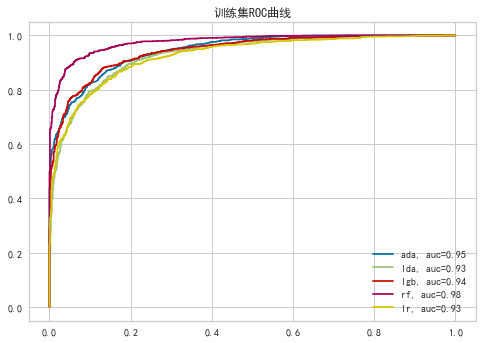

In [175]:
fpr, tpr, thresh = metrics.roc_curve(train_ada['outcome'], train_ada['Score_1'])
plt.plot(fpr,tpr,label="ada, auc="+str(float('%.2f' % adaacu)))

fpr, tpr, thresh = metrics.roc_curve(train_lda['outcome'], train_lda['Score_1'])
plt.plot(fpr,tpr,label="lda, auc="+str(float('%.2f' % ldaauc)))

fpr, tpr, thresh = metrics.roc_curve(train_lgb['outcome'], train_lgb['Score_1'])
plt.plot(fpr,tpr,label="lgb, auc="+str(float('%.2f' % lgbauc)))

fpr, tpr, thresh = metrics.roc_curve(train_rf['outcome'], train_rf['Score_1'])
plt.plot(fpr,tpr,label="rf, auc="+str(float('%.2f' % rfauc)))


fpr, tpr, thresh = metrics.roc_curve(train_lr['outcome'], train_lr['Score_1'])
plt.plot(fpr,tpr,label="lr, auc="+str(float('%.2f' % lrauc)))


plt.title('训练集ROC曲线')

plt.legend(loc=0)
plt.savefig('D:/Desktop/modelV3/训练集ROC曲线.jpg')

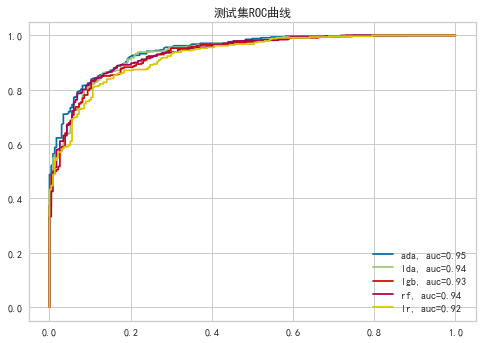

In [176]:
fpr, tpr, thresh = metrics.roc_curve(test_ada['outcome'], test_ada['Score_1'])
plt.plot(fpr,tpr,label="ada, auc="+str(float('%.2f' % adaacut)))

fpr, tpr, thresh = metrics.roc_curve(test_lda['outcome'], test_lda['Score_1'])
plt.plot(fpr,tpr,label="lda, auc="+str(float('%.2f' % ldaauct)))

fpr, tpr, thresh = metrics.roc_curve(test_lgb['outcome'], test_lgb['Score_1'])
plt.plot(fpr,tpr,label="lgb, auc="+str(float('%.2f' % lgbauct)))

fpr, tpr, thresh = metrics.roc_curve(test_rf['outcome'], test_rf['Score_1'])
plt.plot(fpr,tpr,label="rf, auc="+str(float('%.2f' % rfauct)))


fpr, tpr, thresh = metrics.roc_curve(test_lr['outcome'], test_lr['Score_1'])
plt.plot(fpr,tpr,label="lr, auc="+str(float('%.2f' % lrauct)))


plt.title('测试集ROC曲线')
plt.legend(loc=0)
plt.savefig('D:/Desktop/modelV3/测试集ROC曲线.jpg')

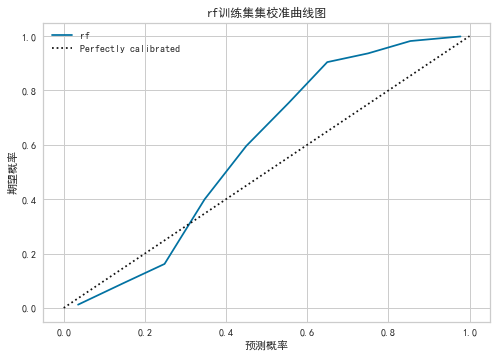

In [182]:
#训练集校准曲线
import matplotlib.pyplot as plt
from pylab import *  
from sklearn.calibration import  calibration_curve

# train_ada['Score_1'] = (train_ada['Score_1'] - train_ada['Score_1'].min()) / (train_ada['Score_1'].max() - train_ada['Score_1'].min())
# fpr, tpr =calibration_curve(train_ada['outcome'],train_ada['Score_1'], n_bins=10)
# plt.plot(fpr,tpr,label="ada")

# train_lda['Score_1'] = (train_lda['Score_1'] - train_lda['Score_1'].min()) / (train_lda['Score_1'].max() - train_lda['Score_1'].min())
# fpr, tpr = calibration_curve(train_lda['outcome'], train_lda['Score_1'], n_bins=10)
# plt.plot(fpr,tpr,label="lda")

# train_lgb['Score_1'] = (train_lgb['Score_1'] - train_lgb['Score_1'].min()) / (train_lgb['Score_1'].max() - train_lgb['Score_1'].min())
# fpr, tpr = calibration_curve(train_lgb['outcome'], train_lgb['Score_1'], n_bins=10)
# plt.plot(fpr,tpr,label="lgb")

train_rf['Score_1'] = (train_rf['Score_1'] - train_rf['Score_1'].min()) / (train_rf['Score_1'].max() - train_rf['Score_1'].min())
fpr, tpr = calibration_curve(train_rf['outcome'], train_rf['Score_1'], n_bins=10)
plt.plot(tpr,fpr,label="rf")

# train_lr['Score_1'] = (train_lr['Score_1'] - train_lr['Score_1'].min()) / (train_lr['Score_1'].max() - train_lr['Score_1'].min())
# fpr, tpr = calibration_curve(train_lr['outcome'], train_lr['Score_1'], n_bins=10)
# plt.plot(fpr,tpr,label="lr")


plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.ylabel("期望概率")
plt.xlabel("预测概率")
plt.title('rf训练集集校准曲线图') 
plt.legend(loc=0)
plt.savefig('D:/Desktop/modelV3/训练集集校准曲线图.jpg')

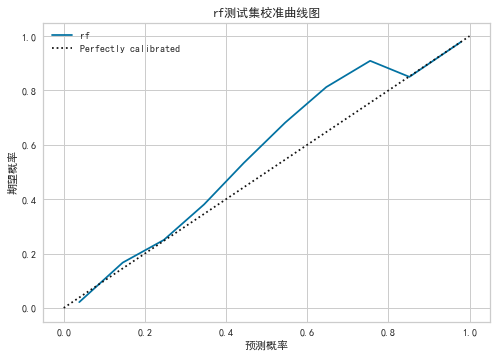

In [180]:
#测试集校准曲线
# test_ada['Score_1'] = (test_ada['Score_1'] - test_ada['Score_1'].min()) / (test_ada['Score_1'].max() - test_ada['Score_1'].min())
# fpr, tpr =calibration_curve(test_ada['outcome'], test_ada['Score_1'], n_bins=10)
# plt.plot(fpr,tpr,label="ada")

# test_lda['Score_1'] = (test_lda['Score_1'] - test_lda['Score_1'].min()) / (test_lda['Score_1'].max() - test_lda['Score_1'].min())
# fpr, tpr = calibration_curve(test_lda['outcome'], test_lda['Score_1'], n_bins=10)
# plt.plot(fpr,tpr,label="lda")

# test_lgb['Score_1'] = (test_lgb['Score_1'] - test_lgb['Score_1'].min()) / (test_lgb['Score_1'].max() - test_lgb['Score_1'].min())
# fpr, tpr = calibration_curve(test_lgb['outcome'], test_lgb['Score_1'], n_bins=10)
# plt.plot(fpr,tpr,label="lgb")
# 
test_rf['Score_1'] = (test_rf['Score_1'] - test_rf['Score_1'].min()) / (test_rf['Score_1'].max() - test_rf['Score_1'].min())
fpr, tpr = calibration_curve(test_rf['outcome'], test_rf['Score_1'], n_bins=10)
plt.plot(tpr,fpr,label="rf")

# test_lr['Score_1'] = (test_lr['Score_1'] - test_lr['Score_1'].min()) / (test_lr['Score_1'].max() - test_lr['Score_1'].min())
# fpr, tpr = calibration_curve(test_lr['outcome'], test_lr['Score_1'], n_bins=10)
# plt.plot(fpr,tpr,label="lr")



plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.ylabel("期望概率")
plt.xlabel("预测概率")
plt.title('rf测试集校准曲线图') 
plt.legend(loc=0)
plt.savefig('D:/Desktop/modelV3/测试集校准曲线图.jpg')

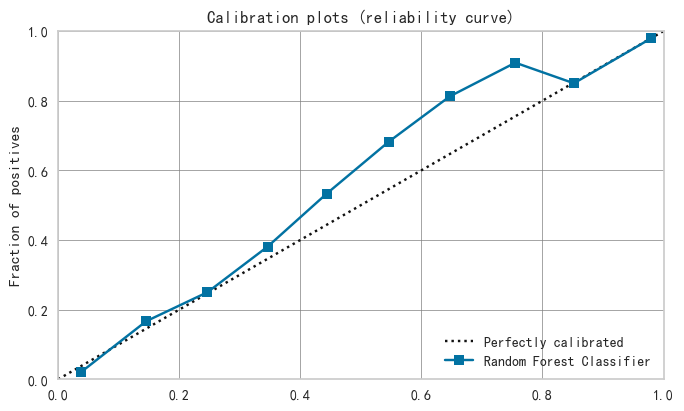

In [191]:
plot_model(rf,plot='calibration')

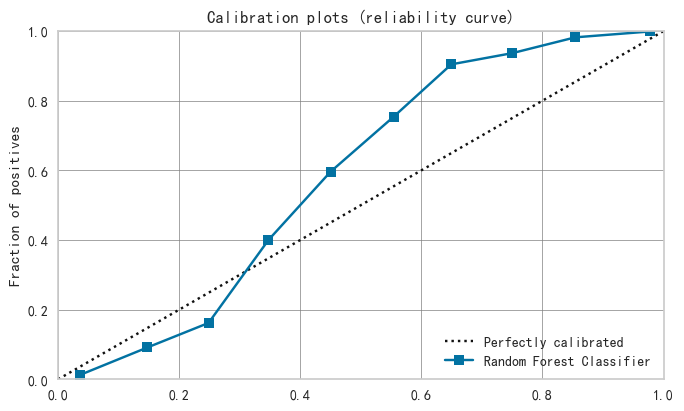

In [190]:
plot_model(rf,plot='calibration',use_train_data=True)

In [193]:
plot_model(rf,plot='feature_all',scale=5,save=True)

'Feature Importance (All).png'

In [184]:
# plot_model(rf,plot='confusion_matrix',save=True)

'Confusion Matrix.png'

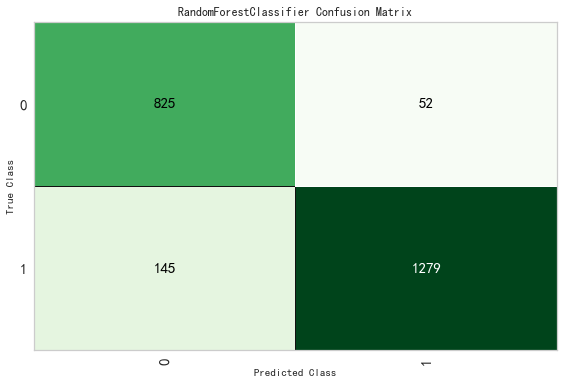

In [188]:
plot_model(rf,plot='confusion_matrix',use_train_data=True)

In [146]:
help(plot_model)

Help on function plot_model in module pycaret.classification:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Union[str, NoneType] = None) -> str
    This function analyzes the performance of a trained model on holdout set. 
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'auc' - Area Under the

In [185]:
save_model(rf,model_name="rf")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['BLINDID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='outcome',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=7,
                                         max_features=0.5602613127560752,
             

In [186]:
save_model(lr,model_name="lr")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['BLINDID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='outcome',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 num...
                 ('fix_multi', 'passthrough'), ('dfs', 'passthrough'),
                 ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=8.052999999999999,
                              